In [1]:
from pulser import Pulse, Sequence, Register
import numpy as np

In [2]:
# I'm going to calculate a quantum evolution of a state in Pulser
# under some random pulse (which means a random Hamiltonian)
# then I'm going to calculate energies of various states

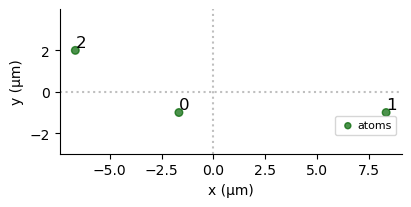

In [3]:
reg = Register.from_coordinates([[0,0], [10, 0], [-5, 3]])
reg.draw()

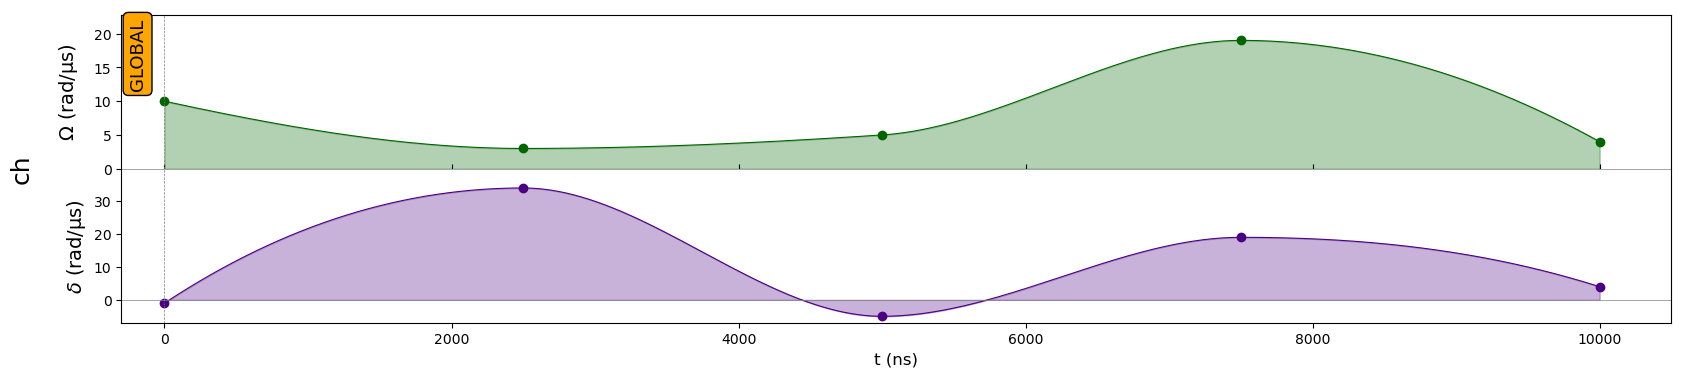

In [4]:
from pulser.devices import MockDevice
from pulser import waveforms

# create sequence by passing register and physical device
seq = Sequence(reg, MockDevice)

# add a laser (a channel) to the sequence
seq.declare_channel('ch', 'rydberg_global')

# define a waveform for the amplitude
amplitude = waveforms.InterpolatedWaveform(
    10000,
    [10, 3, 5, 19, 4]
)

# define a waveform for the detuning
detuning = waveforms.InterpolatedWaveform(
    10000,
    [-1, 34, -5, 19, 4]
) 

# create a pulse and add it to the sequence
pulse = Pulse(amplitude, detuning, 0)
seq.add(pulse, 'ch')
seq.draw()

In [5]:
from pulser_simulation import QutipEmulator

# simulation (this creates the Hamiltonian of the system from the laser pulses)
sim = QutipEmulator.from_sequence(seq)

# run simulation
result = sim.run()

In [6]:
# sample the final state 1000 times
result.sample_final_state(1000)

Counter({'000': 268, '011': 211, '110': 203, '100': 140, '001': 97, '010': 81})

In [15]:
# Let's calculate the magnetization of the first qubit

import qutip

n = (qutip.sigmaz() + qutip.qeye(2))/2
mag1 = qutip.tensor([n, qutip.qeye(2), qutip.qeye(2)]) #magnetization operator of first qubit

exp_val_mag1 = result.expect([mag1])[0]

Text(0, 0.5, 'expectation value magentization on qubit 1')

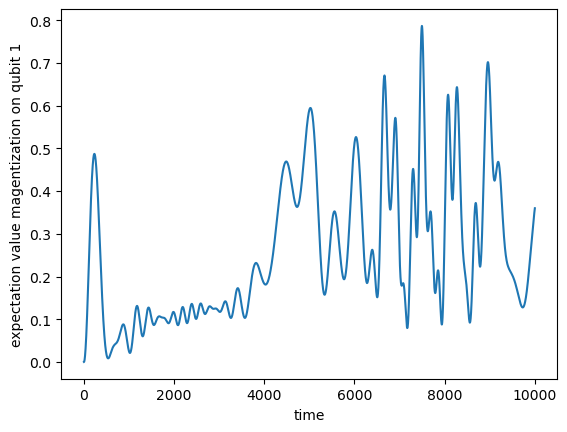

In [16]:
import matplotlib.pyplot as plt

plt.plot(exp_val_mag1)
plt.xlabel('time')
plt.ylabel('expectation value magentization on qubit 1')

In [17]:
# let's assume you want to calculate the probability of measuring the
# basis state |010> over time.

# first we take the projector |010><010| and then qwe calculate its expectation value

# define the state |010>
state = qutip.ket('dud')

# define the projector
projector = state.proj()

exp_val_010 = result.expect([projector])[0]

Text(0, 0.5, 'probability of measuring |010>')

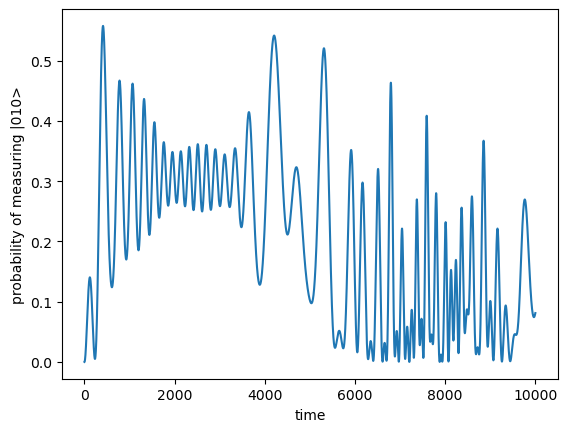

In [18]:
plt.plot(exp_val_010)
plt.xlabel('time')
plt.ylabel('probability of measuring |010>')